One Hot Encoding

In [4]:
! pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


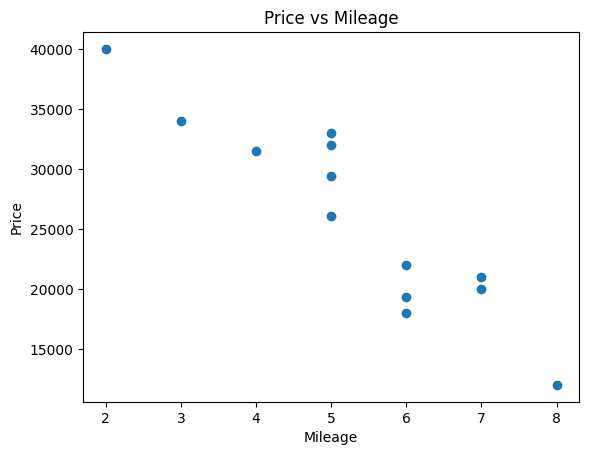

In [7]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [8]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [9]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Audi A5                13 non-null     uint8
 1   BMW X5                 13 non-null     uint8
 2   Mercedez Benz C class  13 non-null     uint8
dtypes: uint8(3)
memory usage: 171.0 bytes


In [10]:
dummies = dummies.astype('int64')

In [11]:
merged = pd.concat([df, dummies], axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
final = merged.drop(['Car Model', 'Audi A5'], axis = 'columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [13]:
X = final.drop('Sell Price($)', axis = 'columns')
y = final['Sell Price($)']

In [14]:
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [15]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
! pip install scikit-learn

   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.7 kB ? eta -:--:--
   --- ----------------------------------- 30.7/307.7 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/307.7 kB 787.7 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/307.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 307.7/307.7 kB 1.7 MB/s eta 0:00:00


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
model.fit(X,y)

LinearRegression()

In [20]:
import warnings
warnings.filterwarnings('ignore')

model.predict([[45000, 4, 0,1]])

array([36991.31721061])

In [21]:
model.predict([[86000, 7, 1,0]])

array([11080.74313219])

In [22]:
model.score(X,y)

0.9417050937281082